In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sn
import numpy as np
from sklearn.cluster import AgglomerativeClustering 
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
cry = pd.read_csv('crime_data.csv')

In [3]:
cry

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
cry1=pd.get_dummies(cry)

In [5]:
cry1

,Murder,Assault,UrbanPop,Rape,Unnamed: 0_Alabama,Unnamed: 0_Alaska,Unnamed: 0_Arizona,Unnamed: 0_Arkansas,Unnamed: 0_California,Unnamed: 0_Colorado,...,Unnamed: 0_South Dakota,Unnamed: 0_Tennessee,Unnamed: 0_Texas,Unnamed: 0_Utah,Unnamed: 0_Vermont,Unnamed: 0_Virginia,Unnamed: 0_Washington,Unnamed: 0_West Virginia,Unnamed: 0_Wisconsin,Unnamed: 0_Wyoming
0,13.2,236,58,21.2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10.0,263,48,44.5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8.1,294,80,31.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.8,190,50,19.5,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.0,276,91,40.6,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,7.9,204,78,38.7,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,3.3,110,77,11.1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,5.9,238,72,15.8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,15.4,335,80,31.9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,17.4,211,60,25.8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
cry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cry2 = sc.fit_transform(cry1)

# # Hierarichal Clustering:-

In [43]:
hc = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage ="average")

# save clusters for chart
hc1 = hc.fit_predict(cry2)
Clusters  = pd.DataFrame(hc1, columns= ["Clusters"])
Clusters.value_counts()

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clusters
0           30
1           12
3            7
2            1
dtype: int64

In [44]:
cry3  = [cry, Clusters]

cry4 = pd.concat(cry3 ,axis=1)
# 
cry4.sort_values("Clusters")

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters,Clusters
49,Wyoming,6.8,161,60,15.6,0,0
28,New Hampshire,2.1,57,56,9.5,0,0
34,Ohio,7.3,120,75,21.4,0,0
26,Nebraska,4.3,102,62,16.5,0,0
25,Montana,6.0,109,53,16.4,0,0
48,Wisconsin,2.6,53,66,10.8,0,0
35,Oklahoma,6.6,151,68,20.0,0,0
22,Minnesota,2.7,72,66,14.9,0,0
36,Oregon,4.9,159,67,29.3,0,0
20,Massachusetts,4.4,149,85,16.3,0,0


# 2) K-means Clustering 

In [45]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(cry2)
    wcss.append(km.inertia_)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [46]:
wcss

[2700.0000000000014,
 2553.9412249943043,
 2481.2176412685967,
 2405.233509125799,
 2349.9185673178963,
 2289.580900135571,
 2238.153868631045,
 2181.1444366489995,
 2128.531929643165,
 2072.328890288743]

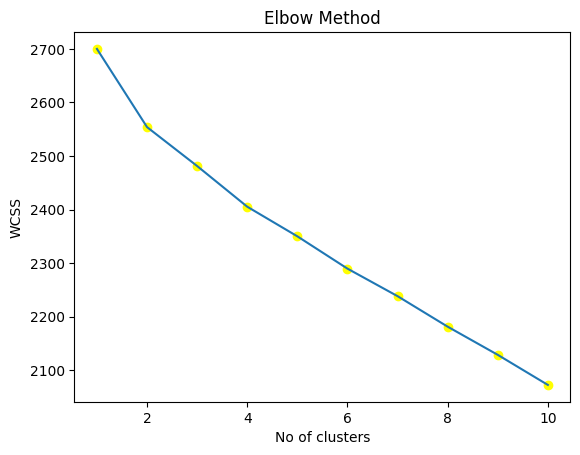

In [47]:
plt.plot(range(1,11), wcss)
plt.scatter(range(1,11), wcss, color = "yellow")
plt.title('Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')

plt.show()

In [48]:
#Conclusion - WCSS is highest at 2 clusters

In [49]:
clusters = KMeans(2, random_state= 42)
clusters.fit(cry2)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

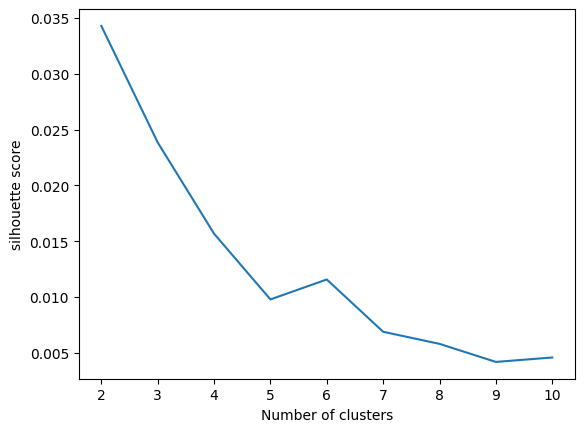

In [50]:
from sklearn.metrics import silhouette_score
silhouette_score(cry2, clusters.labels_)

silhouettescore=[]
for i in range(2,11):
    kmeans = KMeans(n_clusters = i, random_state=42)
    kmeans.fit(cry2)
    silhouettescore.append(silhouette_score(cry2,kmeans.labels_))
    
plt.plot(range(2,11),silhouettescore)
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')
plt.show()

In [51]:

cry ["clusters"] = clusters.labels_
cry.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [52]:
cry.sort_values("clusters")


,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
49,Wyoming,6.8,161,60,15.6,0
35,Oklahoma,6.6,151,68,20.0,0
29,New Jersey,7.4,159,89,18.8,0
28,New Hampshire,2.1,57,56,9.5,0
36,Oregon,4.9,159,67,29.3,0
26,Nebraska,4.3,102,62,16.5,0
25,Montana,6.0,109,53,16.4,0
48,Wisconsin,2.6,53,66,10.8,0
37,Pennsylvania,6.3,106,72,14.9,0
22,Minnesota,2.7,72,66,14.9,0


<AxesSubplot: >

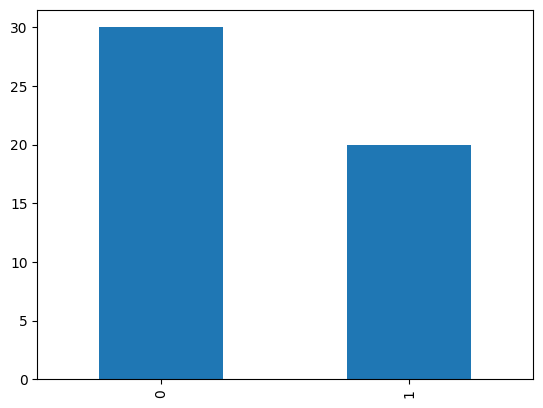

In [53]:
cry["clusters"].value_counts().plot.bar()

# 3) DBSCAN CLUSTERNING

In [54]:
from sklearn.cluster import DBSCAN


In [55]:
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler().fit(cry1)
crydb = stscaler.transform(cry1) 

In [56]:
crydb

array([[ 1.25517927,  0.79078716, -0.52619514, ..., -0.14285714,
        -0.14285714, -0.14285714],
       [ 0.51301858,  1.11805959, -1.22406668, ..., -0.14285714,
        -0.14285714, -0.14285714],
       [ 0.07236067,  1.49381682,  1.00912225, ..., -0.14285714,
        -0.14285714, -0.14285714],
       ...,
       [-0.48425985, -1.08799901, -1.85215107, ...,  7.        ,
        -0.14285714, -0.14285714],
       [-1.20322802, -1.42739264,  0.03210209, ..., -0.14285714,
         7.        , -0.14285714],
       [-0.22914211, -0.11830292, -0.38662083, ..., -0.14285714,
        -0.14285714,  7.        ]])

In [57]:
dbscan = DBSCAN(eps = 0.7, min_samples = 5)
dbscan.fit(crydb)

DBSCAN(eps=0.7)

In [58]:
dbscan.labels_


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

##### This Indicates that the DBSCAN is unable to make clusters,This could be because your data is too spread out and does not have any clear clusters, or because the parameters used in the DBSCAN algorithm are not appropriate for your dataset.
##### In order to get better results with DBSCAN, you may want to experiment with different parameter settings or try pre-processing your data to make it more amenable to clustering.

In [59]:
dbclust  = pd.DataFrame(dbscan.labels_, columns= ["Clusters"])

In [60]:
dbc = (cry,dbclust)
pd.concat(dbc, axis=1)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters,Clusters
0,Alabama,13.2,236,58,21.2,1,-1
1,Alaska,10.0,263,48,44.5,1,-1
2,Arizona,8.1,294,80,31.0,1,-1
3,Arkansas,8.8,190,50,19.5,0,-1
4,California,9.0,276,91,40.6,1,-1
5,Colorado,7.9,204,78,38.7,1,-1
6,Connecticut,3.3,110,77,11.1,0,-1
7,Delaware,5.9,238,72,15.8,0,-1
8,Florida,15.4,335,80,31.9,1,-1
9,Georgia,17.4,211,60,25.8,1,-1
